<a href="https://colab.research.google.com/github/nagae/CoVid-19/blob/master/%E5%9B%BD%E5%86%85%E5%B9%B4%E4%BB%A3%E5%88%A5%E6%AD%BB%E4%BA%A1%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import datetime

zsh:1: command not found: pip


In [2]:
# 国立社会保障・人口問題研究所のデータを読込む
fname = 'http://www.ipss.go.jp/projects/j/Choju/covid19/data/japan_deaths.xlsx'
orig_df = pd.read_excel(fname, sheet_name=None, header=3, usecols=[0,1,2], names=["年代", "男性", "女性"])
orig_df.keys()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [13]:
# シート名で日付がおかしくなっているものがあるので，それを訂正
caution_keys = ['2009028', '2009022', '2009014']
keys = [k if k not in caution_keys else k.replace('090', '09') for k in orig_df.keys()]
dates = [pd.to_datetime(k, format='%y%m%d') for k in keys]
keys

['210816',
 '210809',
 '210802',
 '210726',
 '210719',
 '210712',
 '210705',
 '210628',
 '210621',
 '210614',
 '210607',
 '210531',
 '210524',
 '210517',
 '210510',
 '210503',
 '210426',
 '210419',
 '210412',
 '210405',
 '210329',
 '210322',
 '210315',
 '210308',
 '210301',
 '210222',
 '210215',
 '210208',
 '210201',
 '210125',
 '210118',
 '210111',
 '210104',
 '201221',
 '201214',
 '201207',
 '201130',
 '201123',
 '201116',
 '201109',
 '201102',
 '201026',
 '201019',
 '201012',
 '201005',
 '200928',
 '200922',
 '200914',
 '200907',
 '200831',
 '200824',
 '200817',
 '200810',
 '200803',
 '200727',
 '200720',
 '200713',
 '200706',
 '200629',
 '200622',
 '200615',
 '200531',
 '200430',
 '200331']

In [10]:
# データフレームを作成
df = {k: orig_df[or_k].dropna() for or_k,k in zip(orig_df.keys(), keys)}
for k in df:
    df[k] = df[k].set_index(df[k]["年代"])
    df[k]["合計"] = df[k]["男性"]+df[k]["女性"]
df[keys[0]]

,年代,男性,女性,合計
年代,,,,
<10,<10,0.0,0.0,0.0
10s,10s,0.0,0.0,0.0
20s,20s,6.0,2.0,8.0
30s,30s,27.0,8.0,35.0
40s,40s,91.0,29.0,120.0
50s,50s,278.0,71.0,349.0
60s,60s,713.0,202.0,915.0
70s,70s,1997.0,881.0,2878.0
80s,80s,2790.0,2220.0,5010.0


In [22]:
# 必要な部分だけを抽出
ndf = pd.DataFrame(index=df[keys[0]].index, columns = dates)
for k, date in zip(df.keys(), dates):
    ndf[date] = df[k]["合計"].astype(int)
ndf = ndf.T[-1::-1].iloc[:,0:10]
ndf

年代,<10,10s,20s,30s,40s,50s,60s,70s,80s,90+
2020-03-31,0,0,0,0,0,2,4,17,23,4
2020-04-30,0,0,0,4,5,14,46,109,164,65
2020-05-31,0,0,1,4,8,23,84,213,286,147
2020-06-15,0,0,1,4,8,24,84,225,302,149
2020-06-22,0,0,1,4,9,24,87,231,308,149
...,...,...,...,...,...,...,...,...,...,...
2021-07-19,0,0,7,29,109,315,877,2811,4935,2539
2021-07-26,0,0,7,30,110,318,884,2827,4953,2547
2021-08-02,0,0,7,31,110,322,895,2839,4970,2553
2021-08-09,0,0,8,32,113,337,901,2856,4981,2563


In [23]:
cases = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
cases["Date"] = pd.to_datetime(cases["Date"])
cases = cases.set_index("Date")
cases = cases[cases["Prefecture"] == "ALL"]["Newly confirmed cases"].cumsum().astype(int)
cases_weekly = cases.loc[ndf.index].diff()[1:].astype(int)
ndf_weekly = ndf.diff()[1:]

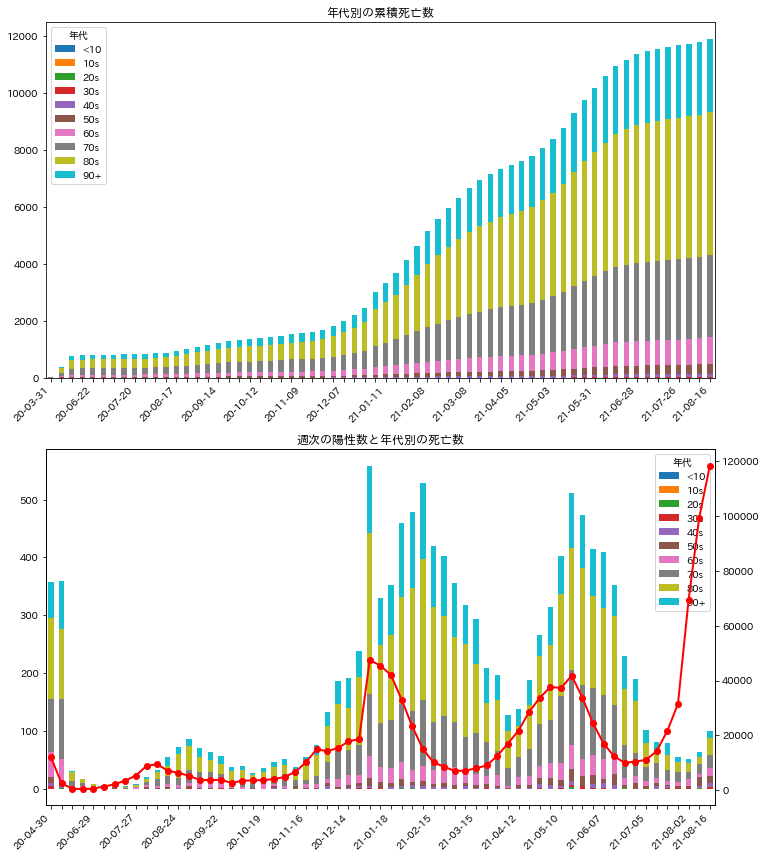

In [24]:
# グラフを描画
fig, ax = plt.subplots(2,1,figsize=(12,16))
ndf.plot.bar(stacked=True, ax=ax[0])
xticklabels = [date.strftime('%y-%m-%d') if i % 4 ==0 or i == len(ndf.index)-1 else "" for (i,date) in enumerate(ndf.index)]
xticklabels2 = [date.strftime('%y-%m-%d') if i % 4 ==0 or i == len(ndf.index)-2 else "" for (i,date) in enumerate(ndf.index[1:])]
ax[0].set_xticklabels(xticklabels, rotation=45, ha="right")
ax[0].set_title("年代別の累積死亡数")
ndf_weekly.plot.bar(stacked=True, ax=ax[1])
ax[1].set_title("週次の陽性数と年代別の死亡数")
ax[1].set_xticklabels(xticklabels2, rotation=45, ha="right")
ax3 = ax[1].twinx()
cases_weekly.plot(ax = ax3, use_index=False, linewidth=2, marker='o', color="red")
plt.savefig('国内年代別死亡数.pdf')
plt.savefig('国内年代別死亡数.png')
plt.show()